In [2]:
import numpy as np
from scipy import *
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling3D,Dense, Dropout,LSTM,Conv1D,MaxPooling1D,Flatten,ConvLSTM2D,TimeDistributed,GlobalMaxPooling3D,GlobalMaxPooling2D,GlobalMaxPooling1D,MaxPooling2D
import sys
import matplotlib.pyplot as plt
from matplotlib import rc

# Preparing training data

# Training the NN on M=3,4,5,6,7,8,9

### Assume that we want to train the network on sizes $M \in [3,M_T]$ with $N$ training samples for each system size, finally evaluating it on $M \in[3,M_E]$, with $M_E>M_T$ the largest extrapolation we explore. We prepare a four-dimensional array with size $N(M_T-3)\times N_t\times M_E\times 3$ filled with zeros. Here $N(M_T-3)$ is the total number of training samples, $N_t$ denotes the number of time steps, and 3 denotes the number of features as we explained in the main text. Now for each sample and time step, we place the string with $M_T$ coupling coefficients randomly within the $M_E$ zeros in this third dimension of the array. We found out that this helps the network to succeed in extrapolating.

In [5]:

Data_train_3=np.array(pd.read_csv("../Data_train_tau=30,M=3,num_train=100000,seed_train=123.dat", header=None))
Data_train_4=np.array(pd.read_csv("../Data_train_tau=30,M=4,num_train=100000,seed_train=123.dat", header=None))                      
Data_train_5=np.array(pd.read_csv("../Data_train_tau=30,M=5,num_train=100000,seed_train=123.dat", header=None))
Data_train_6=np.array(pd.read_csv("../Data_train_tau=30,M=6,num_train=100000,seed_train=123.dat", header=None))
Data_train_7=np.array(pd.read_csv("../Data_train_tau=30,M=7,num_train=100000,seed_train=123.dat", header=None))
Data_train_8=np.array(pd.read_csv("../Data_train_tau=30,M=8,num_train=100000,seed_train=123.dat", header=None))
Data_train_9=np.array(pd.read_csv("../Data_train_tau=30,M=9,num_train=100000,seed_train=123.dat", header=None))


taumax = 30                        
taulist = np.linspace(0, taumax,30)
Num_features=4 #(1,K,J,J)Num_features=4 #(1,K,J,J)

M3=3
h_mat_3=np.zeros((len(Data_train_3),Num_features,M3))
h_mat_3[:,0,:]=np.ones((len(Data_train_3),M3))
h_mat_3[:,1,:]=Data_train_3[:,M3:2*M3]
h_mat_3[:,2,:]=Data_train_3[:,0:M3]
h_mat_3[:,3,:M3-1]=Data_train_3[:,1:M3]
h_mat_3[:,3,M3-1:M3]=Data_train_3[:,0:1]
h_3=((np.kron(taulist/taumax,h_mat_3)).reshape(len(h_mat_3),Num_features,M3,len(taulist)))
h_3=np.swapaxes(h_3,1,3)


M4=4
h_mat_4=np.zeros((len(Data_train_4),Num_features,M4))
h_mat_4[:,0,:]=np.ones((len(Data_train_4),M4))
h_mat_4[:,1,:]=Data_train_4[:,M4:2*M4]
h_mat_4[:,2,:]=Data_train_4[:,0:M4]
h_mat_4[:,3,:M4-1]=Data_train_4[:,1:M4]
h_mat_4[:,3,M4-1:M4]=Data_train_4[:,0:1]
h_4=((np.kron(taulist/taumax,h_mat_4)).reshape(len(h_mat_4),Num_features,M4,len(taulist)))
h_4=np.swapaxes(h_4,1,3)

M5=5
h_mat_5=np.zeros((len(Data_train_5),Num_features,M5))
h_mat_5[:,0,:]=np.ones((len(Data_train_5),M5))
h_mat_5[:,1,:]=Data_train_5[:,M5:2*M5]
h_mat_5[:,2,:]=Data_train_5[:,0:M5]
h_mat_5[:,3,:M5-1]=Data_train_5[:,1:M5]
h_mat_5[:,3,M5-1:M5]=Data_train_5[:,0:1]
h_5=((np.kron(taulist/taumax,h_mat_5)).reshape(len(h_mat_5),Num_features,M5,len(taulist)))
h_5=np.swapaxes(h_5,1,3)



M6=6
h_mat_6=np.zeros((len(Data_train_6),Num_features,M6))
h_mat_6[:,0,:]=np.ones((len(Data_train_6),M6))
h_mat_6[:,1,:]=Data_train_6[:,M6:2*M6]
h_mat_6[:,2,:]=Data_train_6[:,0:M6]
h_mat_6[:,3,:M6-1]=Data_train_6[:,1:M6]
h_mat_6[:,3,M6-1:M6]=Data_train_6[:,0:1]
h_6=((np.kron(taulist/taumax,h_mat_6)).reshape(len(h_mat_6),Num_features,M6,len(taulist)))
h_6=np.swapaxes(h_6,1,3)

M7=7
h_mat_7=np.zeros((len(Data_train_7),Num_features,M7))
h_mat_7[:,0,:]=np.ones((len(Data_train_7),M7))
h_mat_7[:,1,:]=Data_train_7[:,M7:2*M7]
h_mat_7[:,2,:]=Data_train_7[:,0:M7]
h_mat_7[:,3,:M7-1]=Data_train_7[:,1:M7]
h_mat_7[:,3,M7-1:M7]=Data_train_7[:,0:1]
h_7=((np.kron(taulist/taumax,h_mat_7)).reshape(len(h_mat_7),Num_features,M7,len(taulist)))
h_7=np.swapaxes(h_7,1,3)


M8=8
h_mat_8=np.zeros((len(Data_train_8),Num_features,M8))
h_mat_8[:,0,:]=np.ones((len(Data_train_8),M8))
h_mat_8[:,1,:]=Data_train_8[:,M8:2*M8]
h_mat_8[:,2,:]=Data_train_8[:,0:M8]
h_mat_8[:,3,:M8-1]=Data_train_8[:,1:M8]
h_mat_8[:,3,M8-1:M8]=Data_train_8[:,0:1]
h_8=((np.kron(taulist/taumax,h_mat_8)).reshape(len(h_mat_8),Num_features,M8,len(taulist)))
h_8=np.swapaxes(h_8,1,3)

                       
                       
M9=9
h_mat_9=np.zeros((len(Data_train_9),Num_features,M9))
h_mat_9[:,0,:]=np.ones((len(Data_train_9),M9))
h_mat_9[:,1,:]=Data_train_9[:,M9:2*M9]
h_mat_9[:,2,:]=Data_train_9[:,0:M9]
h_mat_9[:,3,:M9-1]=Data_train_9[:,1:M9]
h_mat_9[:,3,M9-1:M9]=Data_train_9[:,0:1]
h_9=((np.kron(taulist/taumax,h_mat_9)).reshape(len(h_mat_9),Num_features,M9,len(taulist)))
h_9=np.swapaxes(h_9,1,3)

print('h_3', shape(h_3))
print('h_4', shape(h_4))
print('h_5', shape(h_5))
print('h_6', shape(h_6))
print('h_7', shape(h_7))

M_large=22#max(M3,M4,M5,M6,M7)
Over_size=2


h_mat_train=np.zeros((7*len(h_3),len(taulist),M_large+2*Over_size,1,Num_features))
n3=np.random.randint(low=Over_size,high=M_large+Over_size-M3,size=100000)
n4=np.random.randint(low=Over_size,high=M_large+Over_size-M4,size=100000)
n5=np.random.randint(low=Over_size,high=M_large+Over_size-M5,size=100000)
n6=np.random.randint(low=Over_size,high=M_large+Over_size-M6,size=100000)
n7=np.random.randint(low=Over_size,high=M_large+Over_size-M7,size=100000)
n8=np.random.randint(low=Over_size,high=M_large+Over_size-M8,size=100000)
n9=np.random.randint(low=Over_size,high=M_large+Over_size-M9,size=100000)

for i in range(len(n3)):
    
    h_mat_train[i,:,n3[i]+Over_size:M3+Over_size+n3[i],0,:]=h_3[i,:,:,:]
    h_mat_train[100000+i,:,n4[i]+Over_size:M4+Over_size+n4[i],0,:]=h_4[i,:,:,:]
    h_mat_train[200000+i,:,n5[i]+Over_size:M5+Over_size+n5[i],0,:]=h_5[i,:,:,:]
    h_mat_train[300000+i,:,n6[i]+Over_size:M6+Over_size+n6[i],0,:]=h_6[i,:,:,:]
    h_mat_train[400000+i,:,n7[i]+Over_size:M7+Over_size+n7[i],0,:]=h_7[i,:,:,:]
    h_mat_train[500000+i,:,n8[i]+Over_size:M8+Over_size+n8[i],0,:]=h_8[i,:,:,:]
    h_mat_train[600000+i,:,n9[i]+Over_size:M9+Over_size+n9[i],0,:]=h_9[i,:,:,:]




Gap_train_3=np.array(pd.read_csv("../gap_train_tau=30,M=3,num_train=100000,seed_train=123.dat", header=None))
Gap_train_4=np.array(pd.read_csv("../gap_train_tau=30,M=4,num_train=100000,seed_train=123.dat", header=None))                      
Gap_train_5=np.array(pd.read_csv("../gap_train_tau=30,M=5,num_train=100000,seed_train=123.dat", header=None))
Gap_train_6=np.array(pd.read_csv("../gap_train_tau=30,M=6,num_train=100000,seed_train=123.dat", header=None))
Gap_train_7=np.array(pd.read_csv("../gap_train_tau=30,M=7,num_train=100000,seed_train=123.dat", header=None))
Gap_train_8=np.array(pd.read_csv("../gap_train_tau=30,M=8,num_train=100000,seed_train=123.dat", header=None))
Gap_train_9=np.array(pd.read_csv("../gap_train_tau=30,M=9,num_train=100000,seed_train=123.dat", header=None))

Gap_train=np.vstack((Gap_train_3,Gap_train_4,Gap_train_5,Gap_train_6,Gap_train_7,Gap_train_8,Gap_train_9))

print(shape(Gap_train))


/u/nmohseni/conda-envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:88: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
/u/nmohseni/conda-envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
/u/nmohseni/conda-envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:90: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
/u/nmohseni/conda-envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:91: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
/u/nmohseni/conda-envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:92: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead


h_3 (100000, 30, 3, 4)
h_4 (100000, 30, 4, 4)
h_5 (100000, 30, 5, 4)
h_6 (100000, 30, 6, 4)
h_7 (100000, 30, 7, 4)
(700000, 30)


/u/nmohseni/conda-envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:130: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead


### 1DCONVLASTM is not implemented in keras therefore we use 2DCONVLSTM with a fake dimension  

In [9]:

h_mat_train=np.zeros((7*len(h_3),len(taulist),9+2*Over_size,1,Num_features))
h_mat_train[:100000,:,Over_size:M3+Over_size,0,:]=h_3[:,:,:,:]
h_mat_train[100000:200000,:,Over_size:M4+Over_size,0,:]=h_4[:,:,:,:]
h_mat_train[200000:300000,:,Over_size:M5+Over_size,0,:]=h_5[:,:,:,:]
h_mat_train[300000:400000,:,Over_size:M6+Over_size,0,:]=h_6[:,:,:,:]
h_mat_train[400000:500000,:,Over_size:M7+Over_size,0,:]=h_7[:,:,:,:]
h_mat_train[500000:600000,:,Over_size:M8+Over_size,0,:]=h_8[:,:,:,:]
h_mat_train[600000:700000,:,Over_size:M9+Over_size,0,:]=h_9[:,:,:,:]
Gap_train=np.vstack ((Gap_train_3,Gap_train_4,Gap_train_5,Gap_train_6,Gap_train_7,Gap_train_8,Gap_train_9))

# input (samples, time_steps, channels, rows, cols).
# output (samples, time_steps, channels, rows, cols).

net = Sequential()
net.add(ConvLSTM2D(filters=20, kernel_size=(3, 3),data_format='channels_first'
                   , batch_input_shape=(None,len(taulist),Num_features,None,None)
                   , return_sequences=True,padding='same')) 
net.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),data_format='channels_first'
                   , return_sequences=True,padding='same')) 
net.add(ConvLSTM2D(filters=60, kernel_size=(3, 3),data_format='channels_first'
                   , return_sequences=True,padding='same'))
net.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),data_format='channels_first'
                   , return_sequences=True,padding='same')) 
net.add(ConvLSTM2D(filters=20, kernel_size=(3, 3),data_format='channels_first'
                   , return_sequences=True,padding='same'))
net.add(ConvLSTM2D(filters=10, kernel_size=(3, 3),data_format='channels_first'
                   , return_sequences=True,padding='same'))
net.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),data_format='channels_first'
                   , return_sequences=True,padding='same'))
net.add(TimeDistributed((GlobalMaxPooling2D( data_format='channels_first'))))
net.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])
#net.set_weights(net.get_weights())

In [ ]:


history=(net.fit(x=np.swapaxes(h_mat_train,2,4),y=log(Gap_train+1).reshape(len(Gap_train),len(Gap_train[0]),1)
                 ,batch_size=500,epochs=50, validation_split=0.1))



In [11]:
net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_14 (ConvLSTM2D) (None, 30, 20, None, None 17360     
_________________________________________________________________
conv_lst_m2d_15 (ConvLSTM2D) (None, 30, 40, None, None 86560     
_________________________________________________________________
conv_lst_m2d_16 (ConvLSTM2D) (None, 30, 60, None, None 216240    
_________________________________________________________________
conv_lst_m2d_17 (ConvLSTM2D) (None, 30, 40, None, None 144160    
_________________________________________________________________
conv_lst_m2d_18 (ConvLSTM2D) (None, 30, 20, None, None 43280     
_________________________________________________________________
conv_lst_m2d_19 (ConvLSTM2D) (None, 30, 10, None, None 10840     
_________________________________________________________________
conv_lst_m2d_20 (ConvLSTM2D) (None, 30, 1, None, None)

Text(0, 0.5, 'MSE')

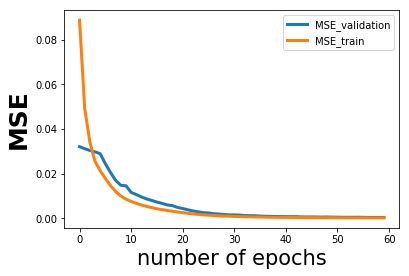

In [263]:
plt.plot(history.history['val_mean_squared_error'], linewidth=3)
plt.plot(history.history['mean_squared_error'], linewidth=3)
legend=plt.legend(('MSE_validation','MSE_train'))
plt.xlabel('number of epochs',fontsize=21)
plt.ylabel('MSE',fontname="cal",fontweight="bold",fontsize=25)

# Test set

### The trained network on system sizes M=3,taumax = 30                        
taulist = np.linspace(0, taumax,30)
M=9
Num_features=4 #(1,K,J,J)..9 is evaluated on M=11,12,18,21

In [7]:
Data_test_extrapolate=np.array(pd.read_csv("../Data_test_tau=30,M=21,num_test=20,seed_test=1451.dat", header=None))
Gap_test_extrapolate=np.array(pd.read_csv("../gap_test_tau=30,M=21,num_test=20,seed_test=1451.dat", header=None))





# Data_test_extrapolate=np.array(pd.read_csv("/u/nmohseni/Gap_prediction_project/NN_diag/Data_test_tau=30,M=18,num_test=200,seed_test=1451.dat", header=None))
# Gap_test_extrapolate=np.array(pd.read_csv("/u/nmohseni/Gap_prediction_project/NN_diag/gap_test_tau=30,M=18,num_test=200,seed_test=1451.dat", header=None))


# Data_test_extrapolate=np.array(pd.read_csv("/u/nmohseni/Gap_prediction_project/NN/Data_test_tau=30,M=12,num_test=1000,seed_test=1451.dat", header=None))
# Gap_test_extrapolate=np.array(pd.read_csv("/u/nmohseni/Gap_prediction_project/NN/gap_test_tau=30,M=12,num_test=1000,seed_test=1451.dat", header=None))


# Data_test_extrapolate=np.array(pd.read_csv("/u/nmohseni/Gap_prediction_project/NN/Data_test_tau=30,M=11,num_test=1000,seed_test=1451.dat", header=None))
# Gap_test_extrapolate=np.array(pd.read_csv("/u/nmohseni/Gap_prediction_project/NN/gap_test_tau=30,M=11,num_test=1000,seed_test=1451.dat", header=None))


M_extrapolate=21

MM=M_large-M_extrapolate


h_extrapolate_test=np.zeros((len(Data_test_extrapolate),Num_features,M_extrapolate))
h_extrapolate_test[:,0,:]= np.ones((len(Data_test_extrapolate),M_extrapolate))                     
h_extrapolate_test[:,1,:]=Data_test_extrapolate[:,M_extrapolate:2*M_extrapolate]
h_extrapolate_test[:,2,:]=Data_test_extrapolate[:,0:M_extrapolate]
h_extrapolate_test[:,3,:M_extrapolate-1]=Data_test_extrapolate[:,1:M_extrapolate]
h_extrapolate_test[:,3,M_extrapolate-1:M_extrapolate]=Data_test_extrapolate[:,0:1]

h_extrapolate_test=((np.kron(taulist/taumax,h_extrapolate_test)).reshape(len(h_extrapolate_test),Num_features,M_extrapolate,len(taulist)))
h_extrapolate_test=np.swapaxes(h_extrapolate_test,1,3)

h_mat_test_extrapolate=np.zeros((len(h_extrapolate_test),len(taulist),M_extrapolate+MM+2*Over_size,1,Num_features))
h_mat_test_extrapolate[:,:,Over_size:M_extrapolate+Over_size,0,:]=h_extrapolate_test



In [46]:
#M=9
error=net.evaluate(x=np.swapaxes(h_mat_test_extrapolate,2,4),y=Gap_test_extrapolate.reshape(len(Gap_test_extrapolate),len(Gap_test_extrapolate[0]),1))

y_predict = net.predict(np.swapaxes(h_mat_test_extrapolate,2,4))


1000/1000 [==============================] - 3s 3ms/sample - loss: 3.5988e-04 - mean_squared_error: 3.5988e-04


In [48]:
#M=8
error=net.evaluate(x=np.swapaxes(h_mat_test_extrapolate,2,4),y=Gap_test_extrapolate.reshape(len(Gap_test_extrapolate),len(Gap_test_extrapolate[0]),1))

y_predict = net.predict(np.swapaxes(h_mat_test_extrapolate,2,4))


1000/1000 [==============================] - 3s 3ms/sample - loss: 2.8941e-04 - mean_squared_error: 2.8941e-04


In [50]:
#M=7
error=net.evaluate(x=np.swapaxes(h_mat_test_extrapolate,2,4),y=Gap_test_extrapolate.reshape(len(Gap_test_extrapolate),len(Gap_test_extrapolate[0]),1))

y_predict = net.predict(np.swapaxes(h_mat_test_extrapolate,2,4))


1000/1000 [==============================] - 3s 3ms/sample - loss: 3.0012e-04 - mean_squared_error: 3.0012e-04


In [119]:
#M=6
error=net.evaluate(x=np.swapaxes(h_mat_test_extrapolate,2,4),y=Gap_test_extrapolate.reshape(len(Gap_test_extrapolate),len(Gap_test_extrapolate[0]),1))

y_predict = net.predict(np.swapaxes(h_mat_test_extrapolate,2,4))


1000/1000 [==============================] - 3s 3ms/sample - loss: 3.0416e-04 - mean_squared_error: 3.0416e-04


In [121]:
#M=5
error=net.evaluate(x=np.swapaxes(h_mat_test_extrapolate,2,4),y=Gap_test_extrapolate.reshape(len(Gap_test_extrapolate),len(Gap_test_extrapolate[0]),1))

y_predict = net.predict(np.swapaxes(h_mat_test_extrapolate,2,4))


1000/1000 [==============================] - 3s 3ms/sample - loss: 4.2810e-04 - mean_squared_error: 4.2810e-04


In [85]:
#M=4
error=net.evaluate(x=np.swapaxes(h_mat_test_extrapolate,2,4),y=Gap_test_extrapolate.reshape(len(Gap_test_extrapolate),len(Gap_test_extrapolate[0]),1))

y_predict = net.predict(np.swapaxes(h_mat_test_extrapolate,2,4))


1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0011 - mean_squared_error: 0.0011


In [87]:
#M=3
error=net.evaluate(x=np.swapaxes(h_mat_test_extrapolate,2,4),y=Gap_test_extrapolate.reshape(len(Gap_test_extrapolate),len(Gap_test_extrapolate[0]),1))

y_predict = net.predict(np.swapaxes(h_mat_test_extrapolate,2,4))


1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0068 - mean_squared_error: 0.0068


NN has been trained on M=9

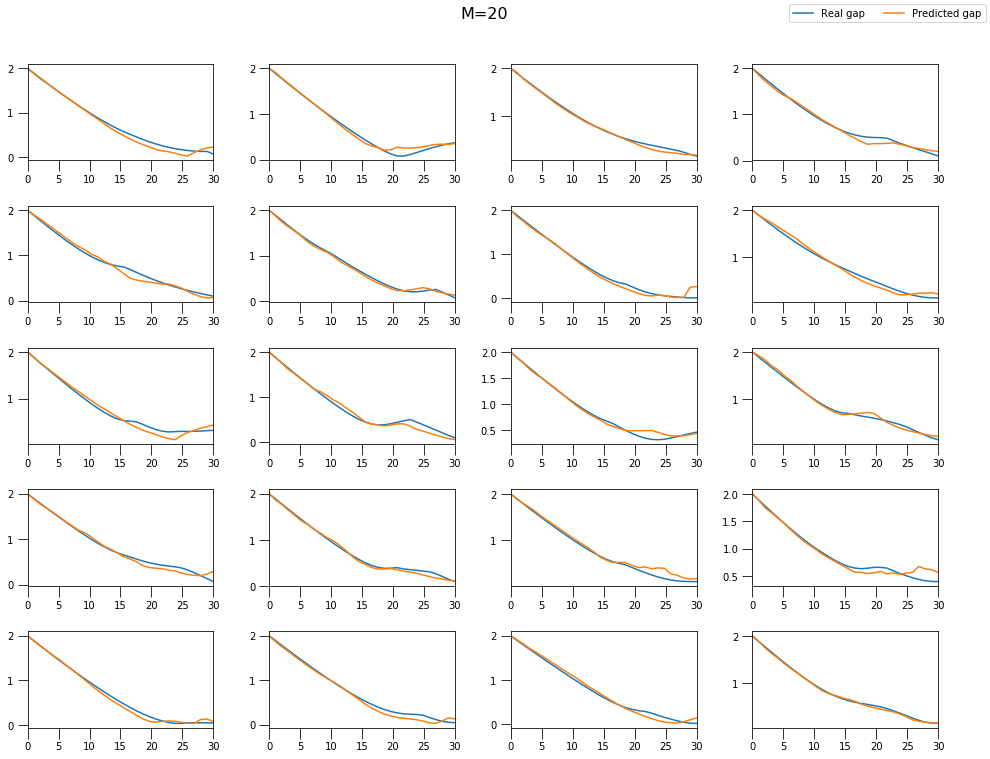

In [119]:

l=0
kk=17
nx=5
ny=4
fig, axes = plt.subplots(nx, ny, figsize=(14,10))
fig.tight_layout()
fig.suptitle('M=20',size=16, y=1.05)

for k in range(0,20):
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,Gap_test_extrapolate[k])
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,(np.exp(y_predict)-1)[k,:,0])
        axes[np.unravel_index(k, [nx, ny])].set_xlim(0,30)
legend=fig.legend(('Real gap','Predicted gap'),loc='upper right',ncol=2)
#legend.draggable()
plt.subplots_adjust(right=0.95)


0.8140263305185983
1.0109269539481565e-07


<Figure size 900x600 with 0 Axes>

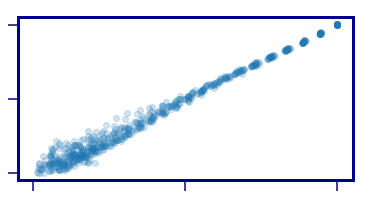

In [16]:


import matplotlib.colors as colors
color='darkblue'
MSE=((Gap_test_extrapolate[:200]-y_predict[:200,:,0])**2)

import matplotlib as mpl
plt.figure(figsize=[6,4], dpi=150)
fig, ax1 = plt.subplots(figsize=(6,3))
x=plt.scatter(Gap_test_extrapolate[:200],(np.exp(y_predict)-1)[:200,:,0],alpha=0.2)
plt.tick_params(labelsize=40)
mpl.rcParams['ytick.major.size'] = 10.5
mpl.rcParams['xtick.major.size'] = 10.5
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(3)
plt.tick_params(color=color, labelcolor=color)

plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
for spine in ax1.spines:
    ax1.spines[spine].set_color(color)
plt.tick_params(width=1.5,labelleft=False,axis='y')
plt.tick_params(width=1.5,labelbottom=False,axis='x')
# cb=plt.colorbar(x)
# cb.set_ticks([1e-6,1e-3,1])
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=color,size=20)
# cb.ax.yaxis.set_tick_params(color=color)
fig.savefig('M=21_scatter.pdf', transparent=True,format='pdf',bbox_inches='tight')
print(np.max(MSE))
print(np.min(MSE))

0.8173639398613285
3.056741147108645e-07


<Figure size 900x600 with 0 Axes>

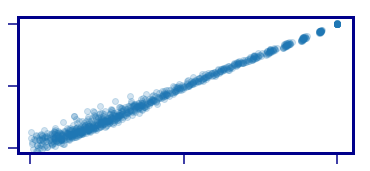

In [12]:


import matplotlib.colors as colors
color='darkblue'
MSE=((Gap_test_extrapolate[:30]-y_predict[:30,:,0])**2)

import matplotlib as mpl
plt.figure(figsize=[6,4], dpi=150)
fig, ax1 = plt.subplots(figsize=(6,2.5))
x=plt.scatter(Gap_test_extrapolate[:30],(np.exp(y_predict)-1)[:30,:,0],alpha=0.2)
plt.tick_params(labelsize=40)
mpl.rcParams['ytick.major.size'] = 10.5
mpl.rcParams['xtick.major.size'] = 10.5
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(3)
plt.tick_params(color=color, labelcolor=color)

plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.xlim(-0.08,2.1)
plt.ylim(-0.08,2.1)
for spine in ax1.spines:
    ax1.spines[spine].set_color(color)
plt.tick_params(width=1.5,labelleft=False,axis='y')
plt.tick_params(width=1.5,labelbottom=False,axis='x')
# cb=plt.colorbar(x)
# cb.set_ticks([1e-6,1e-3,1])
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=color,size=20)
# cb.ax.yaxis.set_tick_params(color=color)
fig.savefig('M=18_scatter.pdf', transparent=True,format='pdf',bbox_inches='tight')
print(np.max(MSE))
print(np.min(MSE))

0.8189921516850962
2.181939551695418e-07


<Figure size 900x600 with 0 Axes>

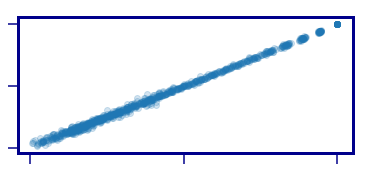

In [9]:


import matplotlib.colors as colors
color='darkblue'
MSE=((Gap_test_extrapolate[:30]-y_predict[:30,:,0])**2)

import matplotlib as mpl
plt.figure(figsize=[6,4], dpi=150)
fig, ax1 = plt.subplots(figsize=(6,2.5))
x=plt.scatter(Gap_test_extrapolate[:30],(np.exp(y_predict)-1)[:30,:,0],alpha=0.2)
plt.tick_params(labelsize=40)
mpl.rcParams['ytick.major.size'] = 10.5
mpl.rcParams['xtick.major.size'] = 10.5
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(3)
plt.tick_params(color=color, labelcolor=color)

plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.xlim(-0.08,2.1)
plt.ylim(-0.08,2.1)
for spine in ax1.spines:
    ax1.spines[spine].set_color(color)
plt.tick_params(width=1.5,labelleft=False,axis='y')
plt.tick_params(width=1.5,labelbottom=False,axis='x')
# cb=plt.colorbar(x)
# cb.set_ticks([1e-6,1e-3,1])
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=color,size=20)
# cb.ax.yaxis.set_tick_params(color=color)
fig.savefig('M=12_scatter.pdf', transparent=True,format='pdf',bbox_inches='tight')
print(np.max(MSE))
print(np.min(MSE))

0.819601152238621
7.774814849012218e-07


<Figure size 900x600 with 0 Axes>

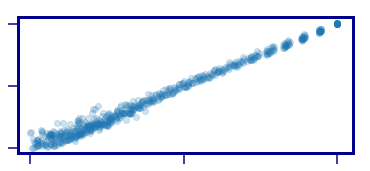

In [12]:


import matplotlib.colors as colors
color='darkblue'
MSE=((Gap_test_extrapolate[:200]-y_predict[:200,:,0])**2)

import matplotlib as mpl
plt.figure(figsize=[6,4], dpi=150)
fig, ax1 = plt.subplots(figsize=(6,2.5))
x=plt.scatter(Gap_test_extrapolate[:200],(np.exp(y_predict)-1)[:200,:,0],alpha=0.2)
plt.tick_params(labelsize=40)
mpl.rcParams['ytick.major.size'] = 10.5
mpl.rcParams['xtick.major.size'] = 10.5
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(3)
plt.tick_params(color=color, labelcolor=color)

plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.xlim(-0.08,2.1)
plt.ylim(-0.08,2.1)
for spine in ax1.spines:
    ax1.spines[spine].set_color(color)
plt.tick_params(width=1.5,labelleft=False,axis='y')
plt.tick_params(width=1.5,labelbottom=False,axis='x')
# cb=plt.colorbar(x)
# cb.set_ticks([1e-6,1e-3,1])
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=color,size=20)
# cb.ax.yaxis.set_tick_params(color=color)
fig.savefig('M=20_scatter.pdf', transparent=True,format='pdf',bbox_inches='tight')
print(np.max(MSE))
print(np.min(MSE))

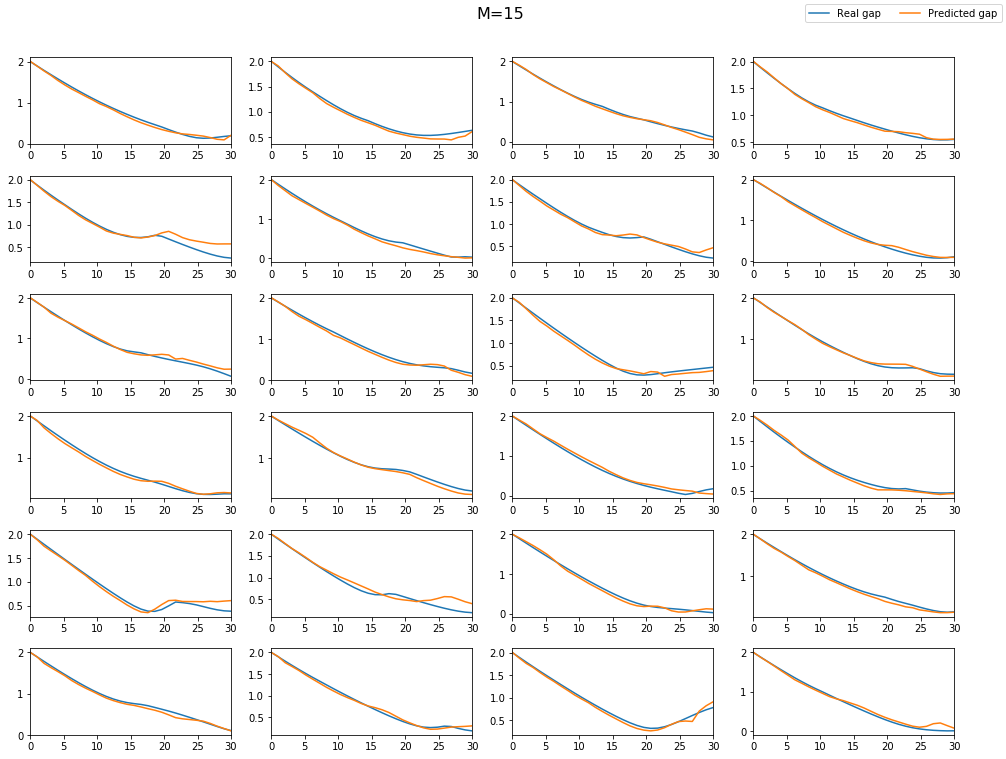

In [28]:

l=0
kk=17
nx=6
ny=4
fig, axes = plt.subplots(nx, ny, figsize=(14,10))
fig.tight_layout()
fig.suptitle('M=15',size=16, y=1.05)

for k in range(0,24):
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,Gap_test_extrapolate[k])
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,y_predict[k,:,0])
        axes[np.unravel_index(k, [nx, ny])].set_xlim(0,30)
legend=fig.legend(('Real gap','Predicted gap'),loc='upper right',ncol=2)
#legend.draggable()
plt.subplots_adjust(right=0.95)


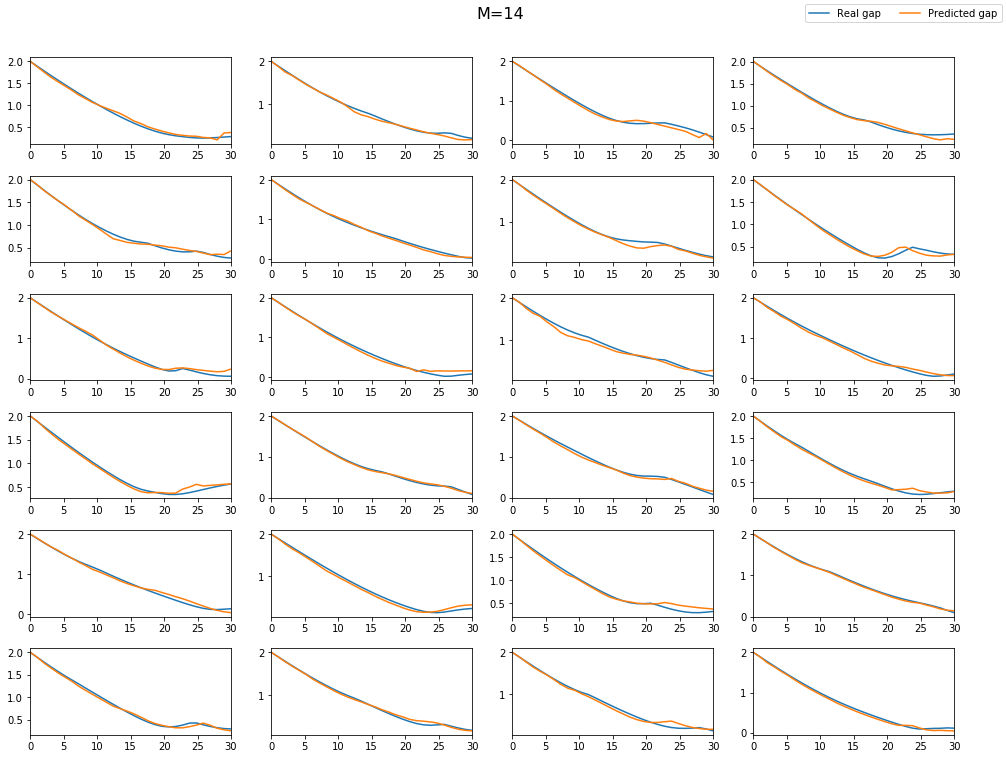

In [32]:

l=0
kk=17
nx=6
ny=4
fig, axes = plt.subplots(nx, ny, figsize=(14,10))
fig.tight_layout()
fig.suptitle('M=14',size=16, y=1.05)

for k in range(0,24):
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,Gap_test_extrapolate[k])
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,y_predict[k,:,0])
        axes[np.unravel_index(k, [nx, ny])].set_xlim(0,30)
legend=fig.legend(('Real gap','Predicted gap'),loc='upper right',ncol=2)
#legend.draggable()
plt.subplots_adjust(right=0.95)


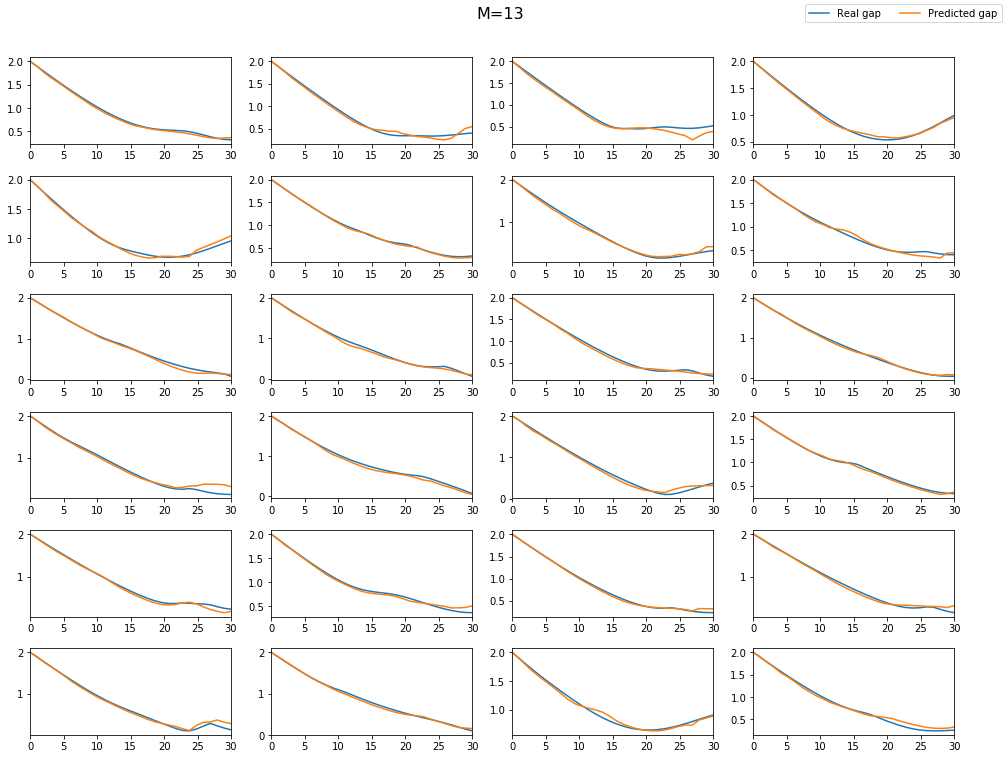

In [35]:

l=0
kk=17
nx=6
ny=4
fig, axes = plt.subplots(nx, ny, figsize=(14,10))
fig.tight_layout()
fig.suptitle('M=13',size=16, y=1.05)

for k in range(0,24):
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,(Gap_test_extrapolate)[k])
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,(y_predict)[k,:,0])
        axes[np.unravel_index(k, [nx, ny])].set_xlim(0,30)
legend=fig.legend(('Real gap','Predicted gap'),loc='upper right',ncol=2)
#legend.draggable()
plt.subplots_adjust(right=0.95)


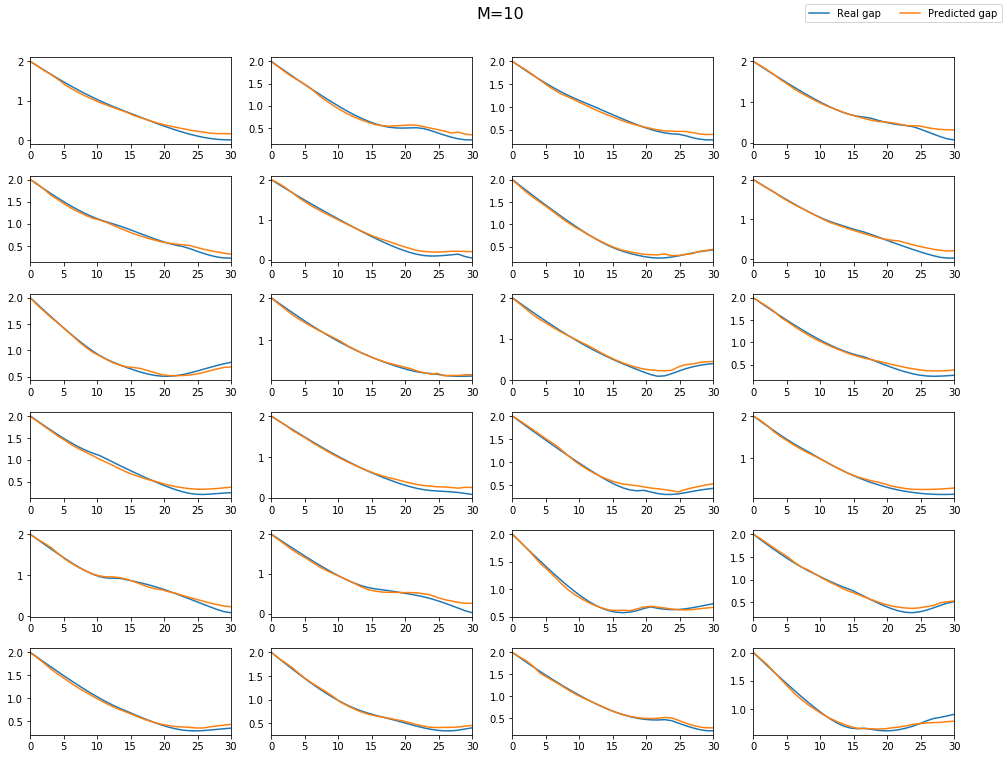

In [312]:

kk=17
nx=6
ny=4
fig, axes = plt.subplots(nx, ny, figsize=(14,10))
fig.tight_layout()
fig.suptitle('M=10',size=16, y=1.05)

for k in range(0,24):
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,Gap_test_extrapolate[k])
        axes[np.unravel_index(k, [nx, ny])].plot(taulist,y_predict[k,:,0])
        axes[np.unravel_index(k, [nx, ny])].set_xlim(0,30)
legend=fig.legend(('Real gap','Predicted gap'),loc='upper right',ncol=2)
#legend.draggable()
plt.subplots_adjust(right=0.95)


NN has not been trained on M=11

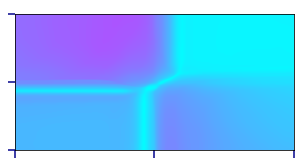

In [38]:
gap=(np.min((np.exp(y_predict[:,:,0])-1),axis=1))


#M=9
import matplotlib.colors as colors
color='darkblue'
fig, axes = plt.subplots(figsize=(5,2.5))
nx, ny = (200, 200)
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
C=plt.contourf(x,y,gap.reshape(200,200) ,100,vmin=0.001,vmax=0.57,cmap='cool')
plt.tick_params(labelsize=25)
plt.tick_params(color=color, labelcolor=color) 
plt.xticks([-1,0,1])
import matplotlib as mpl
mpl.rcParams['ytick.major.size'] = 7.5
mpl.rcParams['xtick.major.size'] = 7.5
# cb=plt.colorbar(C)
# cb.set_label(label='',size=35,weight='bold')
# cb.set_ticks([0.040,0.30,0.35])
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=color,size=25)
plt.tick_params(width=1.5,labelbottom=False,axis='x')
plt.tick_params(width=1.5,labelleft=False,axis='y')
# cb.ax.yaxis.set_tick_params(color=color)
fig.savefig('density_NN_predict.pdf', transparent=True,format='pdf',bbox_inches='tight')
